In [1]:
import json

# Find the best layer 

In [ ]:
EXPERIMENTS = ['gsm-symbolic', 'chess', 'programming', 'arithmetic', 'combined_arithmetic_chess_programming']
INTERVENTION_TYPES = ['chess', 'programming', 'arithmetic', 'combined_arithmetic_chess_programming']
MODES = ['real_world', 'counter_factual']

In [15]:
EXPERIMENT =  'gsm-symbolic'
MODE = 'real_world'

results_path = f'../outputs/{EXPERIMENT}/results/{MODE}/intervention_results.json'

with open(results_path, 'r') as f:
    results = json.load(f)

# Print the results
print(results)

{'gsm-symbolic': {'arithmetic': {'20': {'alpha-0.05': {'alpha': -0.05, 'config_id': 'alpha-0.05', 'experiment': 'gsm-symbolic', 'intervention_type': 'arithmetic', 'layer': 20, 'reason_accuracy': 0.52}, 'alpha-0.1': {'alpha': -0.1, 'config_id': 'alpha-0.1', 'experiment': 'gsm-symbolic', 'intervention_type': 'arithmetic', 'layer': 20, 'reason_accuracy': 0.52}, 'alpha-0.15': {'alpha': -0.15, 'config_id': 'alpha-0.15', 'experiment': 'gsm-symbolic', 'intervention_type': 'arithmetic', 'layer': 20, 'reason_accuracy': 0.525}, 'alpha-0.2': {'alpha': -0.2, 'config_id': 'alpha-0.2', 'experiment': 'gsm-symbolic', 'intervention_type': 'arithmetic', 'layer': 20, 'reason_accuracy': 0.5175}, 'alpha-0.25': {'alpha': -0.25, 'config_id': 'alpha-0.25', 'experiment': 'gsm-symbolic', 'intervention_type': 'arithmetic', 'layer': 20, 'reason_accuracy': 0.515}, 'alpha0.0': {'alpha': 0.0, 'config_id': 'alpha0.0', 'experiment': 'gsm-symbolic', 'intervention_type': 'arithmetic', 'layer': 20, 'reason_accuracy': 0.5

In [3]:
INTERVENTION_TYPE = 'combined_arithmetic_chess_programming'
alpha = 0.1

intervention_type_data = results[EXPERIMENT][INTERVENTION_TYPE]
print(intervention_type_data)
for layer, data in intervention_type_data.items():
    if EXPERIMENT == 'programming':
        accuracy_key = 'pass@1'
    elif 'base' in EXPERIMENT:
        accuracy_key = 'accuracy'
    elif EXPERIMENT == 'chess':
        accuracy_key = 'counterfactual_accuracy'
    elif EXPERIMENT == 'gsm-symbolic':
        accuracy_key = 'reason_accuracy'
    else:
        raise ValueError(f"Experiment {EXPERIMENT} not supported")
    print(f"{layer}: {data[f'alpha{alpha}'][accuracy_key]}")


NameError: name 'results' is not defined

In [3]:
# Assuming intervention_type_data contains layer data and alpha is defined
alpha = 0.1
intervention_type_data = results[EXPERIMENT][INTERVENTION_TYPE]  # Based on your structure

if EXPERIMENT == 'combined_arithmetic_chess_programming':
    accuracy_key = 'accuracy'
elif EXPERIMENT == 'programming':
    accuracy_key = 'pass@1'
elif EXPERIMENT == 'arithmetic':
    accuracy_key = 'counterfactual_accuracy'
elif EXPERIMENT == 'chess':
    accuracy_key = 'counterfactual_accuracy'

# Extract layer data and sort numerically from 1-32
layer_accuracies = []
for layer_str, data in intervention_type_data.items():
    layer_num = int(layer_str)
    if 1 <= layer_num <= 32:  # Only include layers 1-32
        accuracy = data[f'alpha{alpha}'][accuracy_key]
        layer_accuracies.append((layer_num, accuracy))

# Sort by layer number (1-32)
layer_accuracies.sort(key=lambda x: x[0])

# Print sorted layers with their accuracies
print("Layers 1-32 sorted with accuracies:")
for layer, accuracy in layer_accuracies:
    print(f"Layer {layer}: {accuracy:.4f}")

# Find the layer with highest accuracy
best_layer, best_accuracy = max(layer_accuracies, key=lambda x: x[1])
print(f"\nLayer with highest accuracy: Layer {best_layer} with accuracy {best_accuracy:.4f}")

NameError: name 'results' is not defined

# Find the best alpha and accurcy for the chosen layer

In [31]:
# Find the alpha for the best accuracy for specific layer
# LAYER = 7
# INTERVENTION_TYPE = 'combined_arithmetic_chess_programming'

#intervention_args = ('exclusive_chess', 23)
intervention_args = ('gibberish_chess', 5)
# intervention_args = ('gibberish_arithmetic', 18)
# intervention_args = ('exclusive_arithmetic', 9)

LAYER = intervention_args[1]
INTERVENTION_TYPE = intervention_args[0]

EXPERIMENT = 'gsm-symbolic'
MODE = 'gibberish'

if EXPERIMENT == 'programming':
    accuracy_key = 'pass@1'
elif EXPERIMENT == 'base8':
    accuracy_key = 'accuracy'
elif EXPERIMENT == 'gsm-symbolic':
    accuracy_key = 'reason_accuracy'
elif EXPERIMENT == 'chess':
    accuracy_key = 'counterfactual_accuracy'

# Load the results
results_path = f'../outputs/{EXPERIMENT}/results/{MODE}/intervention_results.json'

with open(results_path, 'r') as f:
    results = json.load(f)

print(results)

{'gsm-symbolic': {'exclusive_arithmetic': {'9': {'alpha-0.05': {'alpha': -0.05, 'config_id': 'alpha-0.05', 'experiment': 'gsm-symbolic', 'intervention_type': 'exclusive_arithmetic', 'layer': 9, 'reason_accuracy': 0.5025, 'test_set': False}, 'alpha-0.1': {'alpha': -0.1, 'config_id': 'alpha-0.1', 'experiment': 'gsm-symbolic', 'intervention_type': 'exclusive_arithmetic', 'layer': 9, 'reason_accuracy': 0.4975, 'test_set': False}, 'alpha-0.15': {'alpha': -0.15, 'config_id': 'alpha-0.15', 'experiment': 'gsm-symbolic', 'intervention_type': 'exclusive_arithmetic', 'layer': 9, 'reason_accuracy': 0.5025, 'test_set': False}, 'alpha-0.2': {'alpha': -0.2, 'config_id': 'alpha-0.2', 'experiment': 'gsm-symbolic', 'intervention_type': 'exclusive_arithmetic', 'layer': 9, 'reason_accuracy': 0.505, 'test_set': False}, 'alpha-0.25': {'alpha': -0.25, 'config_id': 'alpha-0.25', 'experiment': 'gsm-symbolic', 'intervention_type': 'exclusive_arithmetic', 'layer': 9, 'reason_accuracy': 0.51, 'test_set': False}, 

['alpha-0.05', 'alpha-0.1', 'alpha-0.25', 'alpha0.1', 'alpha0.2']
Best alpha for layer 23: alpha0.1
Best accuracy for layer 23: 0.5175


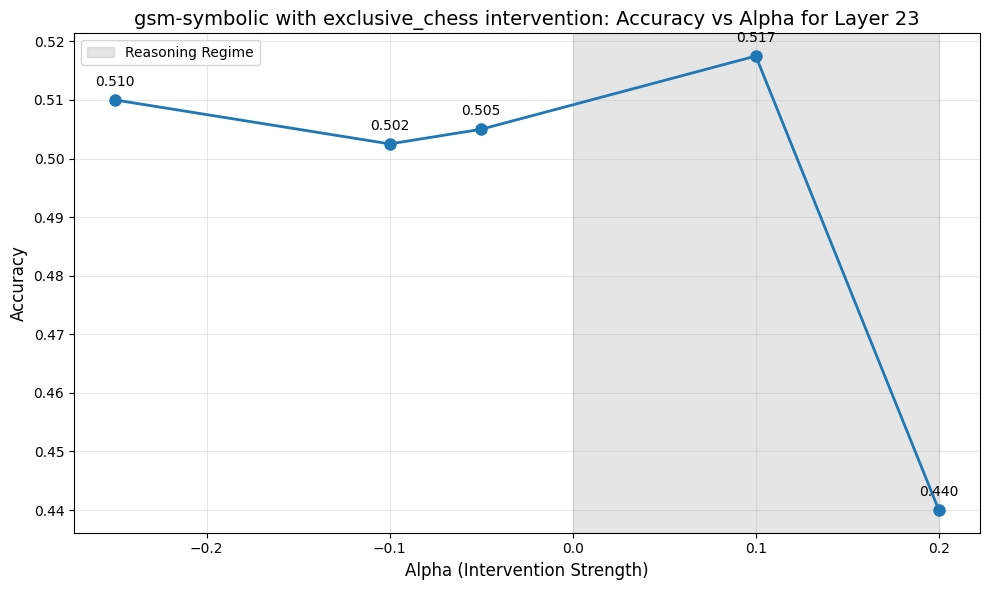

In [32]:
import matplotlib.pyplot as plt

best_alpha = None
best_accuracy = -1
    
alpha_keys = results[EXPERIMENT][INTERVENTION_TYPE][str(LAYER)].keys()
alpha_list = []
# Remove the base key
alpha_keys = [key for key in alpha_keys if key != 'base']
print(alpha_keys)
for alpha_key in alpha_keys:
    accuracy = results[EXPERIMENT][INTERVENTION_TYPE][str(LAYER)][alpha_key][accuracy_key]
    alpha = float(alpha_key.split('alpha')[1])
    if EXPERIMENT in ['base8', 'chess']:
        rw_accuracy = results[EXPERIMENT][INTERVENTION_TYPE][str(LAYER)][alpha_key]['real_world_accuracy']
        alpha_list.append((alpha, accuracy, rw_accuracy))
    else:
        alpha_list.append((alpha, accuracy))
            #print(alpha_key, accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_alpha = alpha_key
    


print(f"Best alpha for layer {LAYER}: {best_alpha}")
print(f"Best accuracy for layer {LAYER}: {best_accuracy}")

# Sort alpha list by alpha value
alpha_list.sort(key=lambda x: x[0])

# Find the accuracy at alpha 0.0
alpha_zero_accuracy = None
alpha_zero_rw_accuracy = None
for item in alpha_list:
    if item[0] == 0.0:
        alpha_zero_accuracy = item[1]
        if len(item) > 2:
            alpha_zero_rw_accuracy = item[2]
        break

plt.figure(figsize=(10, 6))

# Add grey background for reasoning regime (alpha > 0.0)
max_alpha = max([item[0] for item in alpha_list])
plt.axvspan(0.0, max_alpha, alpha=0.2, color='grey', label='Reasoning Regime')

if EXPERIMENT in ['base8', 'chess']:
    # Extract alpha, accuracy, and real world accuracy values
    alphas, accuracies, rw_accuracies = zip(*alpha_list)
    
    plt.plot(alphas, accuracies, 'o-', linewidth=2, markersize=8, label='Accuracy')
    # UNCOMMENT IF YOU WANT TO ADD REAL WORLD ACCURACIES TO THE PLOT
    # plt.plot(alphas, rw_accuracies, 's-', linewidth=2, markersize=8, label='Real World Accuracy')
    
    # Add horizontal lines at alpha 0.0 levels
    if alpha_zero_accuracy is not None:
        plt.axhline(y=alpha_zero_accuracy, color='blue', linestyle='--', alpha=0.5, label=f'Baseline Accuracy ({alpha_zero_accuracy:.3f})')
    # if alpha_zero_rw_accuracy is not None:
    #     plt.axhline(y=alpha_zero_rw_accuracy, color='orange', linestyle='--', alpha=0.5, label=f'Baseline RW Accuracy ({alpha_zero_rw_accuracy:.3f})')
    
    # Add value labels on points
    for alpha, acc, rw_acc in zip(alphas, accuracies, rw_accuracies):
        plt.annotate(f'{acc:.3f}', (alpha, acc), textcoords="offset points", xytext=(0,10), ha='center')
        plt.annotate(f'{rw_acc:.3f}', (alpha, rw_acc), textcoords="offset points", xytext=(0,-15), ha='center')
    
    plt.legend()
else:
    # Extract alpha and accuracy values
    alphas, accuracies = zip(*alpha_list)
    
    plt.plot(alphas, accuracies, 'o-', linewidth=2, markersize=8)
    
    # Add horizontal line at alpha 0.0 level
    if alpha_zero_accuracy is not None:
        plt.axhline(y=alpha_zero_accuracy, color='blue', linestyle='--', alpha=0.5, label=f'Baseline Accuracy ({alpha_zero_accuracy:.3f})')
    
    # Add value labels on points
    for alpha, acc in zip(alphas, accuracies):
        plt.annotate(f'{acc:.3f}', (alpha, acc), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.legend()

plt.xlabel('Alpha (Intervention Strength)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title(f'{EXPERIMENT} with {INTERVENTION_TYPE} intervention: Accuracy vs Alpha for Layer {LAYER}', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()